Лабораторная работа 5. Яровенко Максим, ИУ5Ц-102Б. Вариант 22

# **Задание**

Для одноканальной системы массового обслуживания с ограничением на длину очереди ***m*** составьте дифференциальные уравнения для вероятностей нахождения в заданных состояниях в зависимости от времени. Найдите эти вероятности при определенном в соответствии с вариантом значении ***t***, а также при $t 	\rightarrow \infty$. Канал иногда может выходить из строя. Заявка, которая обслуживается в момент отказа канала ставится в очередь, если там есть места, в противном случае она покидает систему необслуженной. Входящий поток, поток обслуживания, поток отказов и поток восстановления простейшие с соответствующими интенсивностями $\lambda, \mu, \nu, \gamma$. Количество клиентов, от которых могут поступать заявки на обслуживание ***k***. Начальные условия $P_0(0) = 1$.

Найти (теоретически и экспериментально):

- вероятность простоя;
- вероятность образования очереди;
- абсолютную пропускную способность;
- среднюю длину очереди;
- среднее время нахождения заявок в системе;
- среднее число заявок в системе.
- среднее время нахождения в очереди.

Задание по варианту:

In [26]:
Variant<-22
set.seed(Variant)
m<-sample(c(4:18),1)
mu<-runif(1)
lambda<-runif(1)
if (lambda>mu)
  {current<-lambda;
   lambda<-mu;
   mu<-current}
gamma<-runif(1)
nu<-runif(1)
if (gamma<nu)
  {current<-nu;
   nu<-gamma;
   gamma<-current}
if (sample(c(0:1),1))
{k<-sample(c(4:7),1)} else {k<-"inf"}
t<-runif(1)
print("--------------")
View(data.frame(lambda, mu, nu, gamma, k, m, t))

[1] "--------------"


lambda,mu,nu,gamma,k,m,t
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
0.4747389,0.9935258,0.5206539,0.843231,7,9,0.7391713


# **Решение**

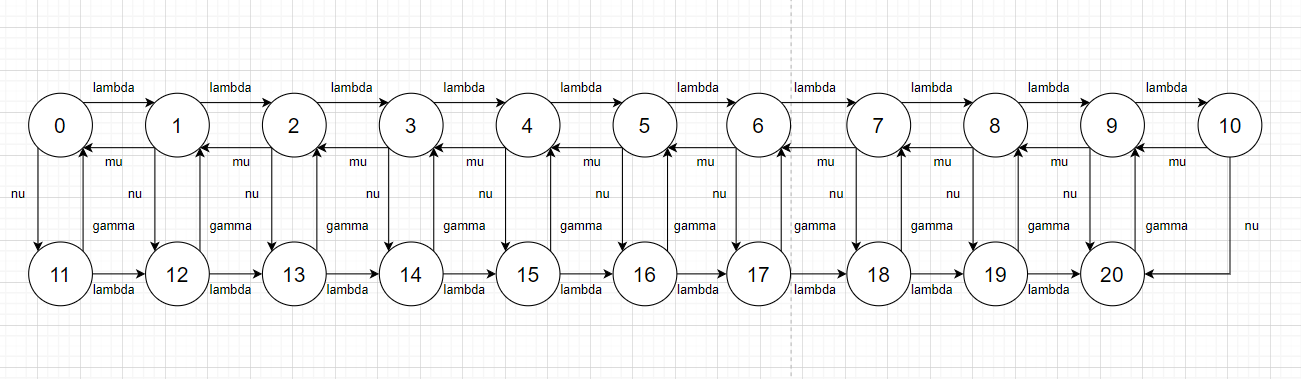

Установка библиотек

In [27]:
install.packages("deSolve")
library("deSolve")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Поиск вероятностей

In [28]:
#Система уравнений
Kolmogorovs = function(t, state, parametres) {
  with(as.list(c(state, parametres)), {
    dP0 = mu*P1 - lambda*P0 + gamma*P11 - nu*P0
    dP1 = mu*P2 - lambda*P1 + gamma*P12 - nu*P1 + lambda*P0 - mu*P1
    dP2 = mu*P3 - lambda*P2 + gamma*P13 - nu*P2 + lambda*P1 - mu*P2
    dP3 = mu*P4 - lambda*P3 + gamma*P14 - nu*P3 + lambda*P2 - mu*P3
    dP4 = mu*P5 - lambda*P4 + gamma*P15 - nu*P4 + lambda*P3 - mu*P4
    dP5 = mu*P6 - lambda*P5 + gamma*P16 - nu*P5 + lambda*P4 - mu*P5
    dP6 = mu*P7 - lambda*P6 + gamma*P17 - nu*P6 + lambda*P5 - mu*P6
    dP7 = mu*P8 - lambda*P7 + gamma*P18 - nu*P7 + lambda*P6 - mu*P7
    dP8 = mu*P9 - lambda*P8 + gamma*P19 - nu*P8 + lambda*P7 - mu*P8
    dP9 = mu*P10 - lambda*P9 + gamma*P20 - nu*P9 + lambda*P8 - mu*P9
    dP10 = - nu*P10 + lambda*P9 - mu*P10


    dP11 = nu*P0 - gamma*P11 - lambda*P11
    dP12 = nu*P1 - gamma*P12 - lambda*P12 + lambda*P11
    dP13 = nu*P2 - gamma*P13 - lambda*P13 + lambda*P12
    dP14 = nu*P3 - gamma*P14 - lambda*P14 + lambda*P13
    dP15 = nu*P4 - gamma*P15 - lambda*P15 + lambda*P14
    dP16 = nu*P5 - gamma*P16 - lambda*P16 + lambda*P15
    dP17 = nu*P6 - gamma*P17 - lambda*P17 + lambda*P16
    dP18 = nu*P7 - gamma*P18 - lambda*P18 + lambda*P17
    dP19 = nu*P8 - gamma*P19 - lambda*P19 + lambda*P18
    dP20 = nu*P10 + nu*P9 - gamma*P20 + lambda*P19

    condNorm = P0 + P1 + P2 + P3 + P4 + P5 + P6 + P7 + P8 + P9 + P10 + P11 + P12 + P13 + P14 + P15 + P16 + P17 + P18 + P19 + P20

    list(c(dP0, dP1, dP2, dP3, dP4, dP5, dP6, dP7, dP8, dP9, dP10, dP11, dP12, dP13, dP14, dP15, dP16, dP17, dP18, dP19, dP20), condNorm = 1)
  })
}

In [29]:
state = c(P0 = 1, P1 = 0, P2 = 0, P3 = 0, P4 = 0, P5 = 0, P6 = 0, P7 = 0, P8 = 0, P9 = 0, P10 = 0, P11 = 0, P12 = 0, P13 = 0, P14 = 0, P15 = 0, P16 = 0, P17 = 0, P18 = 0, P19 = 0, P20 = 0)
times = seq(0, 1, by = 0.000001)

In [30]:
out = ode(y = state, times = times, func = Kolmogorovs, parms = NULL)

In [31]:
outDF = as.data.frame(out[, 1:22])
rownames(outDF) = outDF$time
#Вероятности для заданного t
Ptau = outDF[outDF$time == round(t, 5), 2:22]
Ptau

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,⋯,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.73917,0.5883815,0.1445004,0.02205846,0.002397489,0.0002010258,1.368302e-05,7.827694e-07,3.859095e-08,1.670806e-09,6.451847e-11,⋯,0.1774165,0.05490358,0.009020305,0.001013472,8.652776e-05,5.955197e-06,3.431978e-07,1.700783e-08,7.391775e-10,2.963328e-11


In [43]:
P0=0.179318126589372
P1=0.139826516092352
P2=0.1123984056672602
P3=0.09130227665393874
P4=0.07442672264541732
P5=0.06074115108482351
P6=0.04959124033987773
P7=0.04049323189898805
P8=0.03306574170856422
P9=0.02700101980057358
P10=0.02204875504613723
P11=0.01800481409392717
P12=0.01470257588853145
P13=0.01200599865865173
P14=0.009803997125666462
P15=0.005873634747296091
P16=0.0152683983765189
P17=0.01659027652839291
P18=0.01466041859630235
P19=0.01227205051163741
P20=0.01010237700130178


data = data.frame(P0, P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11, P12, P13, P14, P15, P16, P17, P18, P19, P20)

data

P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,⋯,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1793181,0.1398265,0.1123984,0.09130228,0.07442672,0.06074115,0.04959124,0.04049323,0.03306574,0.02700102,⋯,0.01800481,0.01470258,0.012006,0.009803997,0.005873635,0.0152684,0.01659028,0.01466042,0.01227205,0.01010238


Теоретические вычисления

---



In [44]:
#Веоятность простоя
P0 + sum(data[12:21])

[1] 0.3086027

In [45]:
#Вероятность образования очереди
1 - (P0 + P1 + P12)

[1] 0.6661528

In [46]:
#Абсолютная пропускная способность
Alambda = mu*(sum(data[2:11]))
Alambda

[1] 0.646681

In [47]:
#Средняя длина очереди
Loch = 0
for (i in 1:9) {
  Loch = Loch + i*(data[i + 2] + data[i + 12])
}
Loch[1,1]

[1] 2.457296

In [48]:
#Среднее число заявок в системе
Lsys = 0
for (i in 1:9) {
  Lsys = Lsys + i*(data[i + 1] + data[i + 12])
}
Lsys = Lsys + 10*P11
Lsys[1,1]

[1] 3.067752

In [49]:
#Среднее время нахождения заявок в системе
(Lsys / Alambda)[1,1]

[1] 4.743841

In [50]:
#Среднее время нахождения в очереди
(Loch / Alambda)[1,1]

[1] 3.799858

Экспериментальное решение

---



In [51]:
t = 0
Time = 10000
h = 0.001
Tcome = c()
Tstart = c()
Tend = c()
Busy = c(0,0)
Loch = c(0)
Lsys = c(0)
Tstart[1] = NA

och_programm = c()

working_prog = c()

idx_come = 0


come_time = rexp(1, lambda)

err_time = rexp(1, nu)
working = 1
fix_time = Time

working_prog[1] = 0
working_prog[2] = 0

while (t < Time) {

  #Если сервер выполнил программу
  if ((working_prog[1] <= t) & (working_prog[1] != 0)) {

    Tend[working_prog[2]] = t

    working_prog[1] = 0
    working_prog[2] = 0
  }


  #Если сервер восстановился
  if (fix_time < t) {
    working = 1
    fix_time = Time
    err_time = t +rexp(1, nu)
  }


  #Если сервер отказал
  if (err_time <= t) {
    working = 0
    fix_time = t + rexp(1, gamma)
    err_time = Time
    #Если сервер был занят
    if (working_prog[1] != 0) {
      #Если очередь не полна
      if (length(och_programm) < m) {
          och_programm = c(och_programm, working_prog[2])
      }
      working_prog[1] = 0
      working_prog[2] = 0
    }
  }

  #Если сервер должен принять программу
  if ((working_prog[1] == 0) & (length(och_programm) != 0) & (working == 1)) {
    working_prog[1] = t + rexp(1, mu)
    working_prog[2] = och_programm[1]

    Tstart[working_prog[2]] = t
    och_programm = och_programm[-1]
  }

  #Если пришла программа
  if (t >= come_time) {

    idx_come = idx_come + 1

    Tcome[idx_come] = t
    #Если в очереди есть места
    if (length(och_programm) < m) {
      och_programm = c(och_programm, idx_come)
    }

    come_time = t + rexp(1, lambda)
  }

  if (working_prog[1] != 0){
    Busy[2] = Busy[2] + 1
  }
  else {
    Busy[1] = Busy[1] + 1
  }

  if (toString(Loch[length(och_programm) + 1]) == "NA") {
    Loch[length(och_programm) + 1] = 0
  }
  Loch[length(och_programm) + 1] = Loch[length(och_programm) + 1] + 1
  t = t + h


  if (toString(Lsys[length(och_programm) + 2]) == "NA") {
    Lsys[length(och_programm) + 2] = 0
  }
  if (length(och_programm) > 0) {
    Lsys[length(och_programm) + 2] = Lsys[length(och_programm) + 2] + 1
  }
  else if (working_prog[1] != 0) {
    Lsys[2] = Lsys[2] + 1
  }
  else {
    Lsys[1] = Lsys[1] + 1
  }


  t = t + h
}

print("Вероятность простоя:")
Busy[1]/sum(Busy)


print("Вероятность образования очереди:")
1 - Loch[1] / sum(Loch)


print("Абсолютная пропускная способность:")
length(Tend[!is.na(Tend)])/Time


print("Средняя длина очереди:")
mean_Loch = 0
for (i in 1:length(Loch)) {
  mean_Loch = mean_Loch + (i-1)*Loch[i]
}
mean_Loch = mean_Loch/sum(Loch)
mean_Loch


print("Cреднее время нахождения заявок в системе:")
mean(Tend - Tcome[1:length(Tend)], na.rm = TRUE)


print("Cреднее число заявок в системе:")
mean_Lsys = 0
for (i in 1:length(Lsys)) {
  mean_Lsys = mean_Lsys + (i-1)*Lsys[i]
}
mean_Lsys = mean_Lsys/sum(Loch)
mean_Lsys

print("Cреднее время нахождения в очереди:")
mean(Tstart - Tcome[1:length(Tstart)], na.rm = TRUE)

[1] "Вероятность простоя:"


[1] 0.5443172

[1] "Вероятность образования очереди:"


[1] 0.6488452

[1] "Абсолютная пропускная способность:"


[1] 0.4581

[1] "Средняя длина очереди:"


[1] 2.323768

[1] "Cреднее время нахождения заявок в системе:"


[1] 5.975129

[1] "Cреднее число заявок в системе:"


[1] 3.084839

[1] "Cреднее время нахождения в очереди:"


[1] 5.376485